In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('tested.csv')
test_ids=test["PassengerId"]

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    cols = ["SibSp", "Parch", "Fare", "Age"]
    
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data

train = clean(train)
test = clean(test)

C:\Users\HP\AppData\Local\Temp\ipykernel_8380\3781635773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8380\3781635773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [43]:
test=test.drop(columns=["Survived"],axis=1)

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]
for col in columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)  
train.head()

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
y = train["Survived"]
X = train.drop("Survived", axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [47]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8100558659217877

In [48]:
submission_preds = clf.predict(test)

In [49]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,
                  })

In [50]:
df.to_csv("submission.csv", index=False)
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


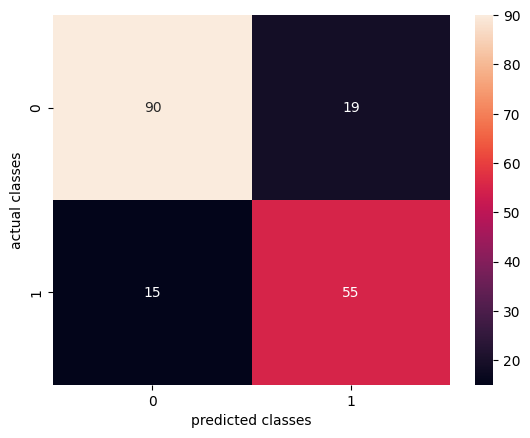

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
con=confusion_matrix(predictions,y_val)
sns.heatmap(con,annot=True)
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [56]:
from sklearn.metrics import roc_curve,auc
pred_probabilities = clf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, pred_probabilities)
roc_auc = auc(fpr, tpr)

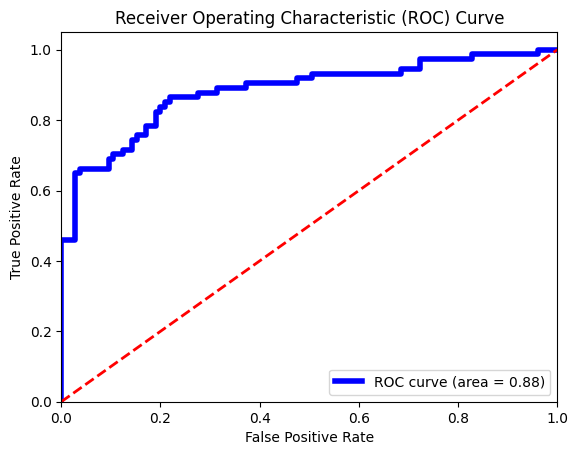

In [57]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate precision
precision = precision_score(y_val, predictions)

# Calculate recall
recall = recall_score(y_val, predictions)

# Calculate F1 score
f1 = f1_score(y_val, predictions)

# Calculate accuracy
accuracy = accuracy_score(y_val, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
Accuracy: 0.8100558659217877
